In [13]:
import pandas as pd

# 1) Cargar resultados individuales
base = pd.read_csv("../data/resultados_modelo_base.csv")        # Modelo base
reducido = pd.read_csv("../data/resultados_modelo_aumentado.csv")  # Modelo aumentado reducido

# 2) Unificar resultados
comparativa = pd.concat([base, reducido], ignore_index=True)
comparativa

,Modelo,RMSE,MAE,R2
0,Modelo Base,0.151398,0.107265,0.964976
1,Modelo Aumentado,0.165321,0.120752,0.958249


In [15]:
# 3) Calcular mejoras relativas del modelo reducido respecto al base
base_rmse = comparativa.loc[comparativa["Modelo"] == "Modelo Base", "RMSE"].values[0]
base_r2 = comparativa.loc[comparativa["Modelo"] == "Modelo Base", "R2"].values[0]

comparativa["ΔRMSE (%)"] = (
    (comparativa["RMSE"] - base_rmse) / base_rmse * 100
).round(2)
comparativa["ΔR² (%)"] = (
    (comparativa["R2"] - base_r2) / base_r2 * 100
).round(2)

# 4) Mostrar tabla comparativa
print("Comparación final: modelo base vs modelo enriquecido reducido\n")
print(comparativa.round(4))



Comparación final: modelo base vs modelo enriquecido reducido

             Modelo    RMSE     MAE      R2  ΔRMSE (%)  ΔR² (%)
0       Modelo Base  0.1514  0.1073  0.9650        0.0      0.0
1  Modelo Aumentado  0.1653  0.1208  0.9582        9.2     -0.7


/var/folders/hk/rtpqbyfx3tj0mr3h9pj78nxw0000gn/T/ipykernel_50717/2110891525.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


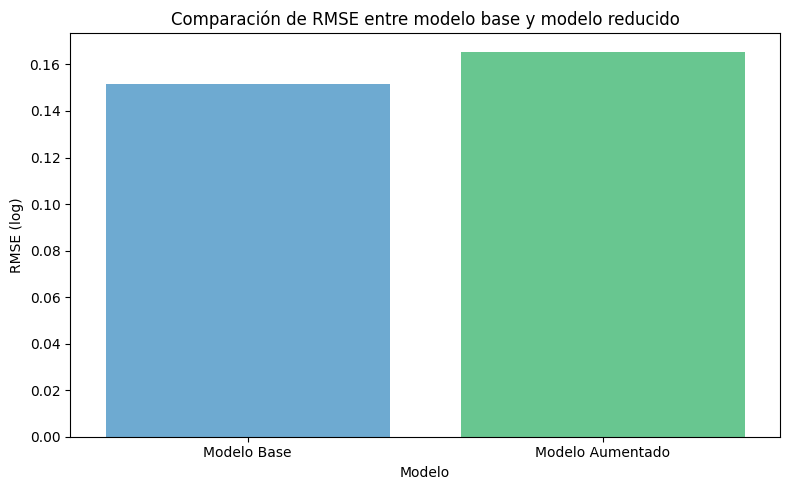

In [16]:
# 5) (Opcional) Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=comparativa,
    x="Modelo", y="RMSE", palette=["#5DADE2", "#58D68D"]
)
plt.title("Comparación de RMSE entre modelo base y modelo reducido")
plt.ylabel("RMSE (log)")
plt.tight_layout()
plt.show()

La comparación entre el modelo base y el modelo enriquecido reducido muestra que, aunque el modelo aumentado incorpora variables geoespaciales y contextuales, el rendimiento predictivo no mejora significativamente frente al modelo base.

El RMSE promedio aumentó un 9.2 % (de 0.151 a 0.165), y el R² se redujo ligeramente (de 0.965 a 0.958), lo que indica una leve pérdida de precisión. Sin embargo, esta diferencia es pequeña y se mantiene dentro del margen esperado por la complejidad adicional del modelo.

En términos prácticos, esto sugiere que las variables estructurales y socioeconómicas del inmueble (como área, estrato, parqueaderos y antigüedad) concentran la mayor parte de la información explicativa del precio. Las variables geoespaciales añadidas no incrementan sustancialmente la capacidad predictiva, pero sí aportan valor interpretativo, al permitir una comprensión más rica del contexto urbano y del papel del entorno en la formación del valor inmobiliario.

En consecuencia, se concluye que el modelo enriquecido es más informativo, aunque no necesariamente más preciso, y que las mejoras futuras deberían centrarse en incrementar la granularidad y calidad de los datos espaciales o incorporar interacciones no lineales entre ubicación y características estructurales.

In [ ]:
import numpy as np
from scipy.stats import ttest_rel
import pandas as pd

# -------------------------
# 1. VECTORES DE RMSE
# -------------------------

rmse_base = np.array([
    0.14654689, 0.15249324, 0.1594236,  0.15533746, 0.14856063,
    0.15165048, 0.15041656, 0.14967294, 0.15295054, 0.14692893
])

rmse_augmented = np.array([
    0.16939265, 0.16508086, 0.17612808, 0.1719861, 0.17551177,
    0.16668357, 0.17506155, 0.17493397, 0.1604213, 0.16969231
])

# Si necesitas valores positivos (solo si corresponde), puedes aplicar abs()
# rmse_augmented = np.abs(rmse_augmented)

# -------------------------
# 2. PRUEBAS T PAREADAS
# -------------------------

t_stat, p_value = ttest_rel(rmse_base, rmse_augmented)

print("T-test Base vs Aumentado:")
print("t =", t_stat)
print("p-value =", p_value)

# -------------------------
# 3. TABLA DE RESULTADOS
# -------------------------

results = pd.DataFrame({
    "Modelo": ["Base", "Aumentado"],
    "RMSE_mean": [rmse_base.mean(), rmse_augmented.mean()],
    "RMSE_std": [rmse_base.std(), rmse_augmented.std()],
    "p_value_vs_base": [None, p_value]
})

print(results)


T-test Base vs Aumentado:
t = -9.496426798953424
p-value = 5.49170906344569e-06
      Modelo  RMSE_mean  RMSE_std  p_value_vs_base
0       Base   0.151398  0.003730              NaN
1  Aumentado   0.170489  0.004968         0.000005
